### Problem Statement - Determine the eligibility for granting Home loan.

In [3]:
import numpy as np                                                  # importing required python libraries
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv(r'C:\Users\Lenovo\OneDrive\Documents\Datasets\homeLoanTrainData.csv')            # importing dataset for analysis
data.shape

(614, 13)

In [5]:
data.columns                                                # listing out all the available columns of dataset

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
data.dtypes                                                 # understanding the datatypes of each columns

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
# since dependents is an object datatype, checking its reason
data['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [8]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
# dropping irrelevent cols not req for analysis. goal is to make dataset simple
data = data.drop('Loan_ID',axis = 1)

### Basic Data Exploration

In [10]:
data.describe()                                                                 # analyzing numeric features

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [11]:
data.describe(include = ['object'])                                             # analyzing categorical features

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


In [12]:
data.isna().sum()                                                               # counting missing or nan values

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
cat_cols = data.dtypes =='object'                                               # extracting categorical cols in a list format by checking with datatype
cat_cols = list(cat_cols[cat_cols].index)
print(cat_cols)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [14]:
data[cat_cols].head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [15]:
num_cols = data.dtypes !='object'                                               # extracting numerical cols in a list format by checking with datatype
num_cols = list(num_cols[num_cols].index)
print(num_cols)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [16]:
data[num_cols].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


### Basic Data visualization: Univariate

In [17]:
#Q: How many loans the company has approved in the past?
data['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

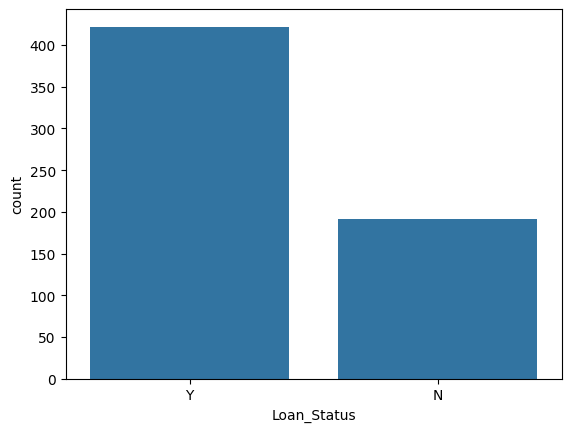

In [18]:
#Q: How many loans the company has approved in the past?
sns.countplot(data=data, x='Loan_Status')
plt.show()

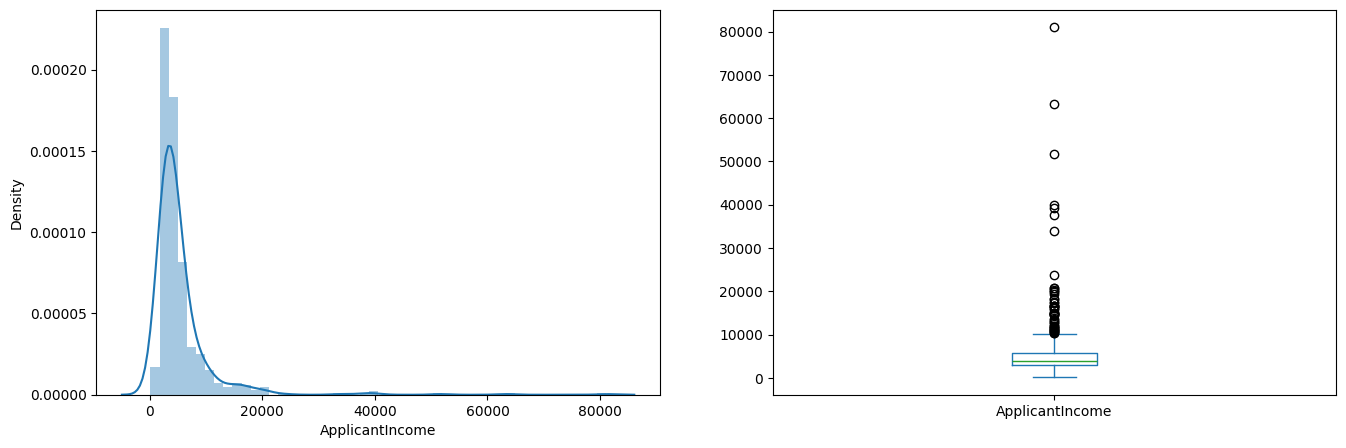

In [19]:
#Income of the applicant
plt.subplot(121)
sns.distplot(data["ApplicantIncome"])

plt.subplot(122)
data["ApplicantIncome"].plot.box(figsize=(16,5))
plt.show()

Income of majority of individuals lie between 0 - 20L. However there are a lot of outlier salaries (upto >80L) in the data.<br>
Since the graph is right skewed, taking the log of log_normal_dist will result in a normal distribution

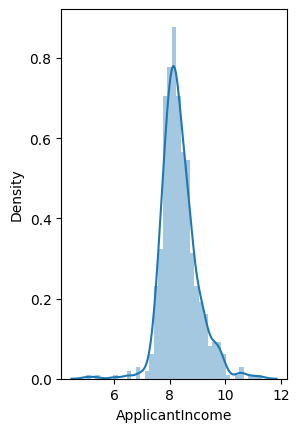

In [20]:
plt.subplot(121)
sns.distplot(np.log(data["ApplicantIncome"]))

plt.show()

it is noticable that the x & y axis scales have adjusted aswell

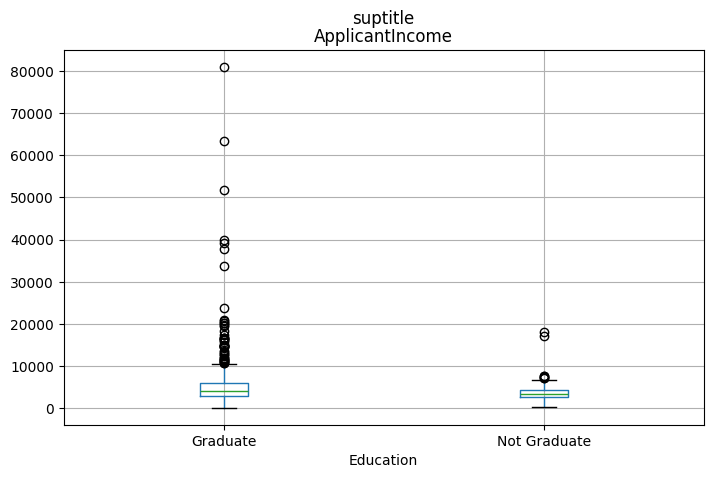

In [21]:
#Slice the applicant income data by Education
data.boxplot(column='ApplicantIncome', by="Education", figsize=(8,5))
plt.suptitle("suptitle")
plt.show()

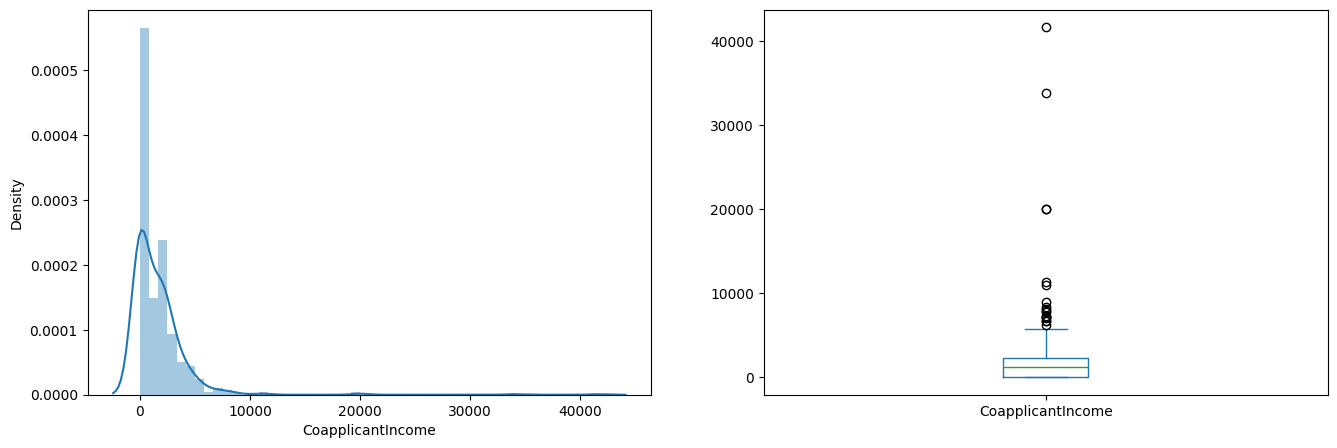

In [22]:
#co-applicant income
plt.subplot(121)
sns.distplot(data["CoapplicantIncome"])

plt.subplot(122)
data["CoapplicantIncome"].plot.box(figsize=(16,5))
plt.show()

## Loan_Status and Applicant Income

In [23]:
data.groupby("Loan_Status")['ApplicantIncome'].mean()

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64

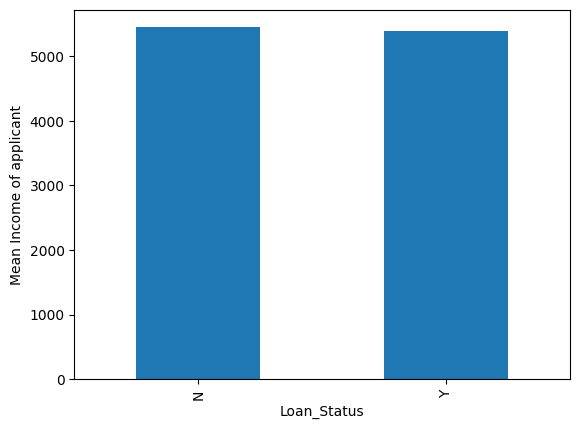

In [24]:
data.groupby("Loan_Status")['ApplicantIncome'].mean().plot.bar()
plt.ylabel("Mean Income of applicant")
plt.show()

Observation : From the above graph, it is not very clear whether the approval/rejection of loan depends on income of applicant 

Nothing conclusive about this analysis

### Simple Feature Engineering

In [25]:
# Feature binning: segmenting income into different range categories
bins=[0,2500,4000,6000, 8000, 10000, 20000, 40000, 81000]
group=['Low','Average','medium', 'H1', 'h2', 'h3', 'h4' , 'Very high']
data['Income_bin']= pd.cut(data['ApplicantIncome'],bins,labels=group)

In [26]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,medium
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,medium
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,medium


Analyzing income_bin w.r.t. other columns

In [27]:
pd.crosstab(data["Income_bin"],data["Loan_Status"])                                 # pivoting loan status w.r.t. the Applicant_Income feature

Loan_Status,N,Y
Income_bin,,
Low,34,74
Average,67,159
medium,45,98
H1,20,34
h2,9,22
h3,13,27
h4,3,6
Very high,1,2


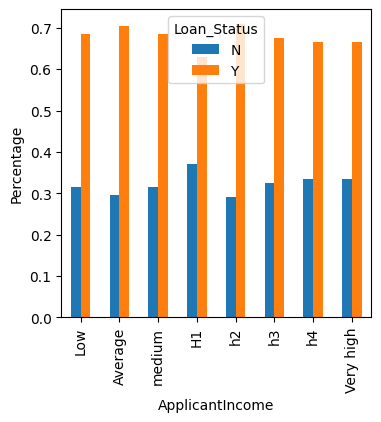

In [28]:
Income_bin = pd.crosstab(data["Income_bin"],data["Loan_Status"])                        

Income_bin.div(Income_bin.sum(axis=1),axis=0).plot(kind="bar",figsize=(4,4))                                    # calculating % of row total (divides each value in the df, by its corresponding row total, converting the values to proportions)
plt.xlabel("ApplicantIncome")
plt.ylabel("Percentage")
plt.show()

Observation : It can be inferred that Applicant income does not affect the chances of loan approval. Which seems wrong as per our understanding.<br>
From the above graph the proportion of approval/rejection of loan is almost consistant across different income range categories.

Nothing conclusive about this analysis

## Co-applicant Income and Loan Status

In [29]:
# Feature binning: segmenting co-appplicant income into different range categories 
bins=[0,1000,3000,42000]
group =['Low','Average','High']
data['CoapplicantIncome_bin']=pd.cut(data["CoapplicantIncome"],bins,labels=group)

In [30]:
pd.crosstab(data["CoapplicantIncome_bin"],data["Loan_Status"])                                                      # pivoting loan status w.r.t. the co-applicant income feature

Loan_Status,N,Y
CoapplicantIncome_bin,,
Low,3,19
Average,61,161
High,32,65


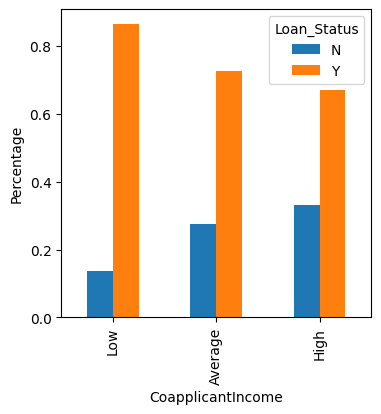

In [31]:
CoapplicantIncome_Bin = pd.crosstab(data["CoapplicantIncome_bin"],data["Loan_Status"])
CoapplicantIncome_Bin.div(CoapplicantIncome_Bin.sum(axis = 1),axis=0).plot(kind='bar',figsize=(4,4))                    # summing the values of each row then dividing each number by its row total
plt.xlabel("CoapplicantIncome")
plt.ylabel("Percentage")
plt.show()

Observation : co-applicant having low income is getting maximum loan approved

Nothing conclusive about this analysis aswell

In [32]:
data['CoapplicantIncome'].value_counts().head()

CoapplicantIncome
0.0       273
1666.0      5
2083.0      5
2500.0      5
1625.0      3
Name: count, dtype: int64

## Applicant + Co-applicant Income VS Loan Status

In [33]:
# New feature:  total household income
data["TotalIncome"] = data["ApplicantIncome"] + data["CoapplicantIncome"]

In [34]:
# Feature binning: segmenting TotalIncome into different range categories 
bins = [0,3000,5000,8000,81000]
group = ['Low','Average','High','Very High']
data["TotalIncome_bin"] = pd.cut(data["TotalIncome"],bins,labels=group)

In [35]:
pd.crosstab(data["TotalIncome_bin"], data["Loan_Status"])                                           # pivoting loan status w.r.t. the new total_Income feature

Loan_Status,N,Y
TotalIncome_bin,,
Low,20,27
Average,69,154
High,61,151
Very High,42,90


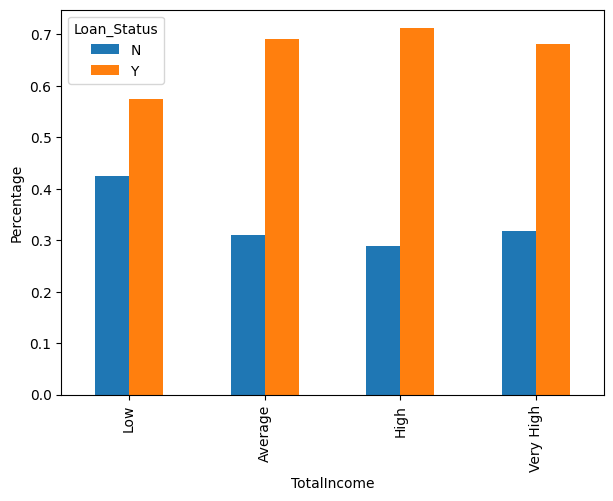

In [36]:
TotalIncome = pd.crosstab(data["TotalIncome_bin"],data["Loan_Status"])
TotalIncome.div(TotalIncome.sum(axis = 1),axis=0).plot(kind='bar', figsize=(7,5))
plt.xlabel("TotalIncome")
plt.ylabel("Percentage")
plt.show()

Observation: We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High Income.<br>Now something looks concrete

In [37]:
# removing unnecessary cols from dataframe
data = data.drop(["Income_bin","CoapplicantIncome_bin","TotalIncome_bin"],axis=1)
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0


## Loan Amount and Loan Term

In [39]:
# from the visible data, the unit of LoanAmount term is not understandable whether in days, months or years
data['Loan_Amount_Term'].value_counts()                                 # checking distinct categories of LA

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

Now from the wholistict view its clear that count is w.r.t. tenure of each loan term, hence unit is in 'days'

In [40]:
data['Loan_Amount_Term'] = (data['Loan_Amount_Term']/12).astype('float')                # converting tenure unit from days to years

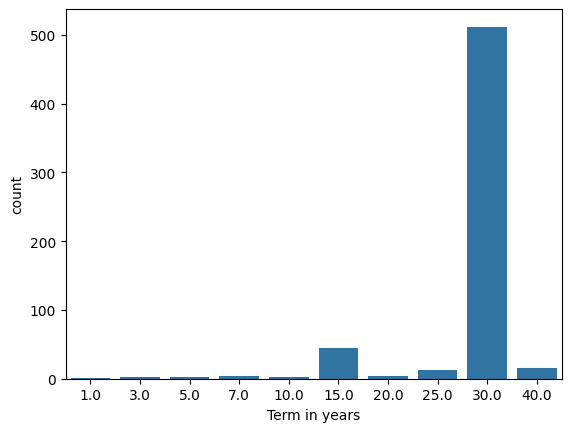

In [41]:
sns.countplot(x='Loan_Amount_Term', data=data)
plt.xlabel("Term in years")
plt.show()

Observation: We can clearly see that more than 90% of the loans were applied for 30 years.

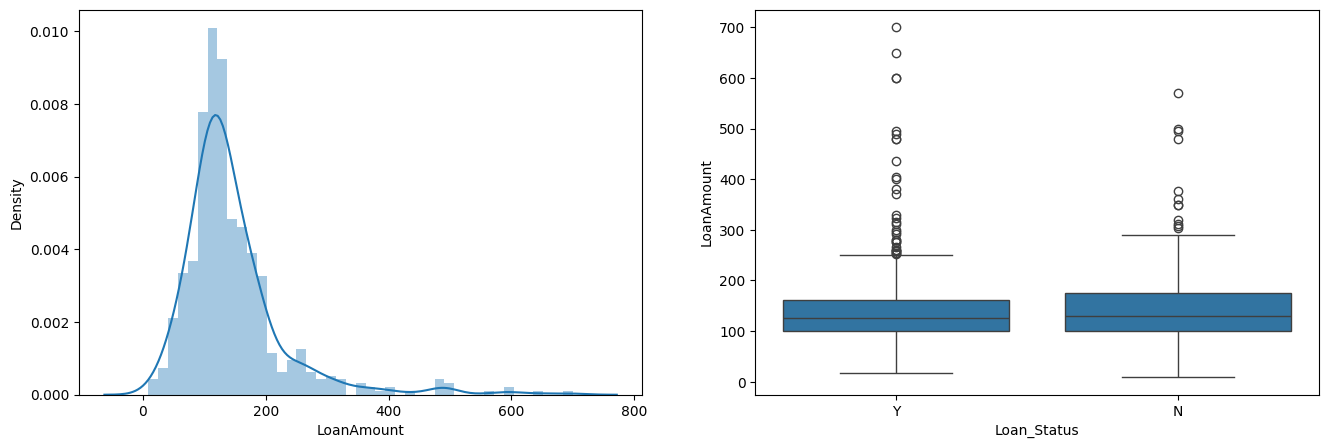

In [42]:
# Distribution of "LoanAmount" variable :

plt.figure(figsize=(16,5))
plt.subplot(121)
sns.distplot(data['LoanAmount']);

plt.subplot(122)
sns.boxplot(data=data, x='Loan_Status', y = 'LoanAmount')

plt.show()

In [45]:
# calculated attribute : yearly loan amt given by bank to cust
data['Loan_Amount_per_year']  = data['LoanAmount']/data['Loan_Amount_Term']                     # Approximate calc: ignoring interest rates as we dont know that.
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,Loan_Amount_per_year
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,5849.0,NaN
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,6091.0,4.266667
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,3000.0,2.200000
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,4941.0,4.000000
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,6000.0,4.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,30.0,1.0,Rural,Y,2900.0,2.366667
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,15.0,1.0,Rural,Y,4106.0,2.666667
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,30.0,1.0,Urban,Y,8312.0,8.433333
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,30.0,1.0,Urban,Y,7583.0,6.233333


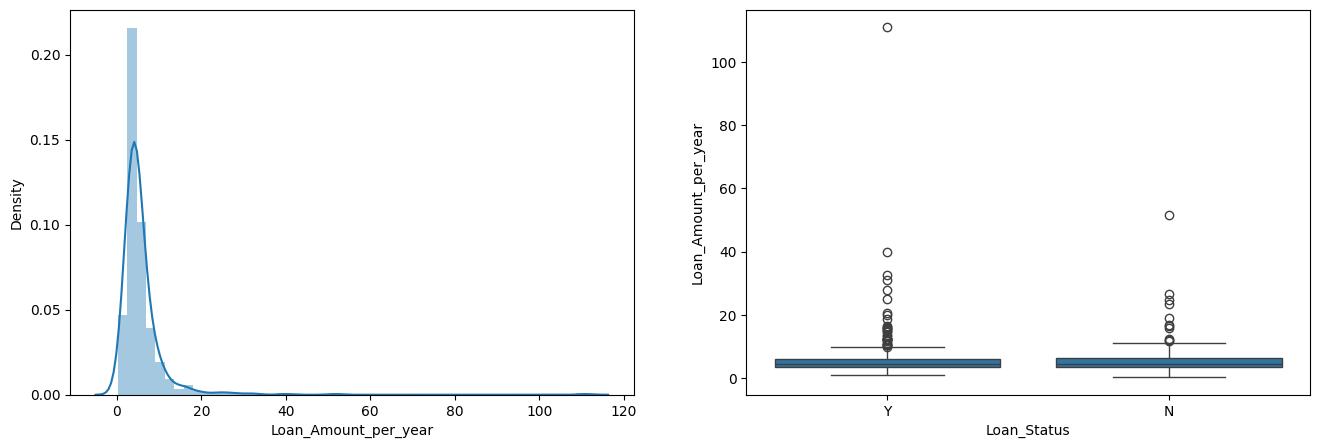

In [44]:
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.distplot(data['Loan_Amount_per_year']);

plt.subplot(122)
sns.boxplot(data=data, x='Loan_Status', y = 'Loan_Amount_per_year')

plt.show()

Observations: <br>
1.majority loan amt given by bank every year, ranges between 0-20 L<br>
2.loan approved by banks for extremely high amt is miniscule <br>
3.bank is rejecting only few of the cust who are demanding yearly loan amt > 15L

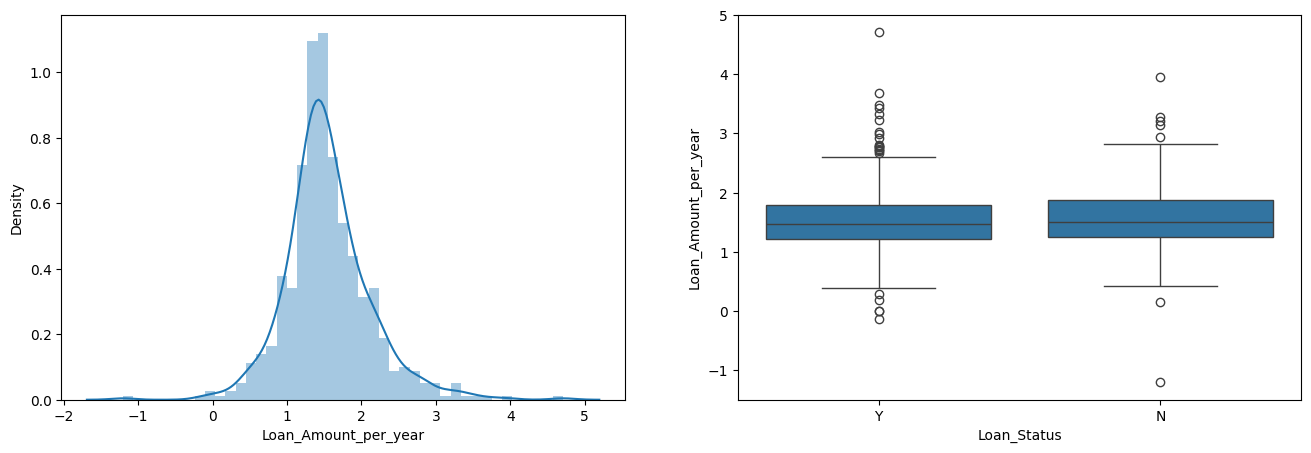

In [46]:
# log transformation for right skewed distribution
plt.figure(figsize=(16,5))
plt.subplot(121)
log_loanAmount = np.log(data['Loan_Amount_per_year'])
sns.distplot(log_loanAmount)

plt.subplot(122)
sns.boxplot(data=data, x='Loan_Status', y = log_loanAmount)

plt.show()

## EMI and Loan Repayment

In [48]:
# New Feature : EMI calc based on the Loan Amount Per year.
data['EMI'] = data['Loan_Amount_per_year']*1000/12                                                          # convertion to actual currency units per year
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,Loan_Amount_per_year,EMI
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,5849.0,NaN,NaN
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,6091.0,4.266667,355.555556
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,3000.0,2.200000,183.333333
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,4941.0,4.000000,333.333333
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,6000.0,4.700000,391.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,30.0,1.0,Rural,Y,2900.0,2.366667,197.222222
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,15.0,1.0,Rural,Y,4106.0,2.666667,222.222222
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,30.0,1.0,Urban,Y,8312.0,8.433333,702.777778
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,30.0,1.0,Urban,Y,7583.0,6.233333,519.444444


In [51]:
#New Feature : Able_to_pay_EMI
data['Able_to_pay_EMI'] = (data['TotalIncome']*0.1 > data['EMI']).astype('int')                                         # check if 10% of income is gt EMI amt. return 1 if yes 0 if no
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,Loan_Amount_per_year,EMI,Able_to_pay_EMI
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,5849.0,NaN,NaN,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,6091.0,4.266667,355.555556,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,3000.0,2.200000,183.333333,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,4941.0,4.000000,333.333333,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,6000.0,4.700000,391.666667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,30.0,1.0,Rural,Y,2900.0,2.366667,197.222222,1
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,15.0,1.0,Rural,Y,4106.0,2.666667,222.222222,1
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,30.0,1.0,Urban,Y,8312.0,8.433333,702.777778,1
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,30.0,1.0,Urban,Y,7583.0,6.233333,519.444444,1


<Axes: xlabel='Able_to_pay_EMI', ylabel='count'>

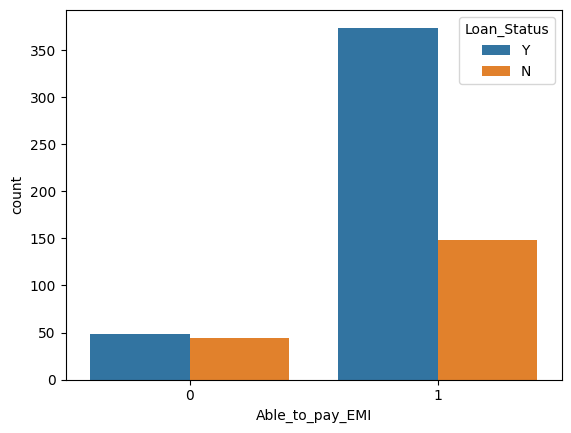

In [52]:
sns.countplot(x='Able_to_pay_EMI', data = data, hue = 'Loan_Status')

Observations:<br>
<t>For Customers:<br>
<t>There is 50% chance that you may get the loan approved if you cannot pay the EMI. <br>
<t>But there, is a 72% chance that you may get the loan approved if you can pay the EMI.

For Bank:<br>
For ~50% cust who cannot pay the EMI ( 0 side) bank has incorrectly given them loan.<br>
In ~150 cases, bank has not given the loan, despite the math that cust will be able to pay EMI

## Dependents and Loan Approval

In [53]:
data['Dependents'].value_counts()                                               # dependents variable is object type

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [56]:
data['Dependents'].replace('3+',3,inplace=True)                                 # capping dependents greater than 3
data['Dependents']=data['Dependents'].astype('float')                           # converting dependents dtype to float

<Axes: xlabel='Dependents', ylabel='count'>

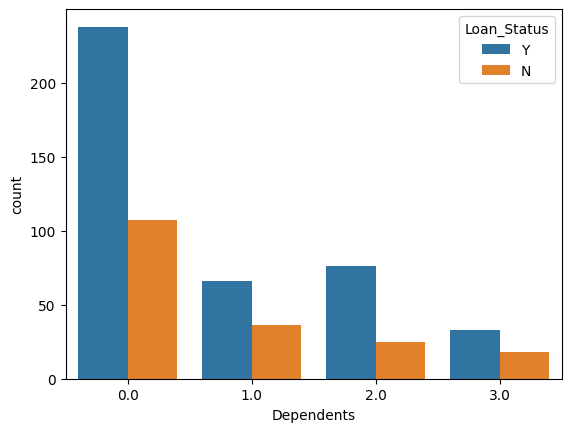

In [57]:
sns.countplot(data =data, x = 'Dependents', hue = 'Loan_Status')

Observations:<br>
No Dependents till 2 dependents will helps you get loan easily.<br>
Post 2, the gap between approval & rejection proportion reduces

## Credit History vs Loan Approval

In [58]:
# checking if customers have taken loan in past, reflecting in their credit score
data['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

475 custs have taken loan previously, while 89 have never taken

<Axes: xlabel='Credit_History', ylabel='count'>

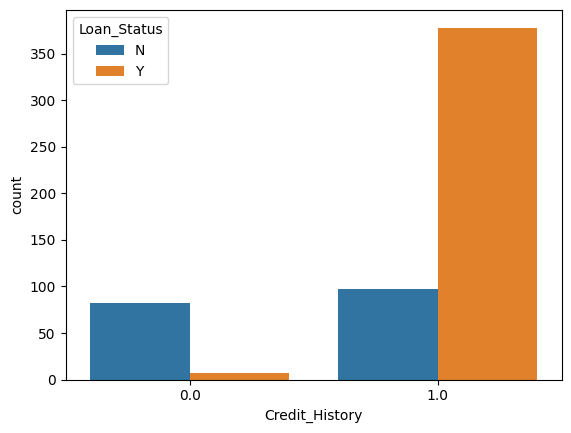

In [60]:
# plotting credit history w.r.t loan approval
sns.countplot(data =data, x = 'Credit_History', hue = 'Loan_Status')

Observations:<br>
It is evident from graph that approval rate is 80% if customer's credit history is aligned with the guidlines.<br>
While loan approval significantly reduces with lesser credit history records.